# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**.


## 1. Introdução

Uma determinada fintech focada em consumidores finais pessoa física constataou um grande número de fraudes em transações bancárias.

O setor de fraudes apontou que existem clientes que se queixaram de não contratar serviços específicos, como o crédito pessoal, e após isso transferir para outras contas desconhecidas.

Após análises pelas equipes de segurança, os protocolos de utilização da senha foram realizados em conformidade, ou seja, cada cliente autenticou com sua própria senha de maneira regular.

Em função disso, o banco precisa arcar com reembolsos e medidas de contenção para evitar processos judiciais, pois os clientes alegam terem sido invadidos por hackers ou algo parecido.

Uma das formas de solucionar ou minimizar este problema é com a utilização de outras formas de autenticação, sobretudo em operações críticas, como a obtenção de crédito pessoal.

Desta forma podemos implementar uma verificação de identidade com prova de vida (liveness), que utilize uma verificação e identificação facial.

Caso o cliente não seja autenticado, ele será atendido por uma esteira dedicada e as evidências da não identificação serão encaminhadas para a área de IA para validação dos parâmetros e limiares para aperfeiçoamento do modelo.

Será necessário construir:

* Detector de faces
* Identificação de faces (podendo ser um comparador entre um rosto de documento e outra da prova de vida)
* Detecção de vivacidade (liveness) para evitar que um fraudador utilize uma foto estática.


>Formas alternativas de prover a identificação e prova de vivacidade, além destas que foram solicitadas poderão ser submetidas.


<p align="center">
    <img src="https://github.com/michelpf/fiap-ml-visao-computacional-detector-liveness/blob/master/notebook/imagens/liveness.jpg?raw=1">
</p>

Imagem retirada do [Grunge](https://www.grunge.com/192826/company-testing-robocop-facial-recognition-software-with-us-police/).

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Iremos constuir uma forma de validar se uma determinada imagem foi ou não adulterada e se trata de uma produção fraudade.

Existem diversas formas de validar a vivacidade, e neste sentido conto com a criatividade de vocês dado que já dominam encontrar uma face numa imagem, aplicar marcos faciais e até mesmo construir uma rede neural convulacional.

A abordagem mais simples é pela construção de uma rede neural com imagens de fotos de rostos de outras fotos e fotos de rostos sem modificações. Tal classificador deverá classificar se dada imagem possui vivacidade ou não com uma pontuação de probabilidade.

Referências que abordam o tema para servir de inspiração:

1. [PyImageSearch](https://pyimagesearch.com/2019/03/11/liveness-detection-with-opencv/), Liveness detection with OpenCV;
2. [Kickertech](https://kickertech.com/face-liveness-detection-via-opencv-and-tensorflow/), Liveness detection via OpenCV and Tensorflow.
3. [Towards Data Science](https://towardsdatascience.com/real-time-face-liveness-detection-with-python-keras-and-opencv-c35dc70dafd3?gi=24f8e1b740f9), Real-time face liveness detection with Python, Keras and OpenCV.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Alan Mascarenhas Silva   | RM 351078     | 5DTSR |
| Bruno Nicolino Ramos     | RM 351057     | 5DTSR |
| Daniel Cabral            | RM 352717     | 5DTSR |
| Vitor Hugo da Silva Lima | RM 350741     | 5DTSR |

## 3. Abordagem e organização da solução do problema (2 pontos)

Como o grupo pretende deteccar a prova de vivacidade de uma determinada imagem? Quais os passos e os building blocks deste processo?

A solução proposta tem uma abordagem organizada e estruturada para resolver o problema de verificação de identidade com prova de vivacidade, utilizando três principais etapas: detecção de faces, verificação de identidade e detecção de vivacidade. A organização segue os seguintes passos:

1.   **Captura da Imagem:**
  *   Utilizando JavaScript para capturar uma imagem diretamente da webcam do usuário;
  *   Função 'take_photo' para capturar a imagem e armazená-la como um arquivo.

2.   **Detecção de Faces:**
  *   Utilização do Haar Cascade para detectar faces na imagem capturada;
  *   Função 'detectar_marcar_labels' para carregar a imagem, converter para escala de cinza e detectar faces.

3.   **Pré-processamento da Imagem:**
  *   Redimensionamento e normalização da imagem para prepará-la para o modelo de detecção de vivacidade;
  *   Normalização dos valores dos pixels (divisão por 255.0);
  *   Função 'Processamento_Imagem' para redimensionar e normalizar a imagem.

4.   **Criação e Treinamento do Modelo de Detecção de Vivacidade:**
  *   Treinamento de uma CNN para classificar imagens como reais ou falsas;
  *   Utilização do 'ImageDataGenerator' do Keras para criar geradores de dados para treinamento e validação;
  *   Definição da arquitetura da CNN com camadas de convolução, pooling, flattening, e fully connected;
  *   Função 'CriarModelo' para criar o modelo de detecção de vivacidade;
  *   Treinamento do modelo com os dados do dataset de faces reais e falsas;
  *   Salvamento do modelo treinado em um arquivo 'model.h5'.

5.   **Predição e Rotulagem:**
  *   Utilização do modelo treinado para predizer e rotular faces na imagem capturada como reais ou falsas;
  *   Rotulagem das faces como 'Real' ou 'Fake' com base na previsão;
  *   Desenho de retângulos ao redor das faces e anotação das previsões na imagem;
  *   Função 'detectar_marcar_labels' para processar a imagem, realizar predições e adicionar rótulos.


**Resposta**:

## 4 Desenvolvimento da solução (5,5 pontos)

Detalhe o passo-a-passo do algoritmo de deteção de vivacidade.
Se optar pela construção e treinamento de um modelo de redes neurais convulucionais, apresente a arquitetura, prepare os dados de treinamento, realize o treinamento.

In [1]:
# Instalando as bibliotecas necessárias
!git clone https://github.com/BrunoNicolinoRamos/ComputerVision.git

Cloning into 'ComputerVision'...
remote: Enumerating objects: 2263, done.
remote: Counting objects: 100% (2263/2263), done.
remote: Compressing objects: 100% (2257/2257), done.
remote: Total 2263 (delta 9), reused 2240 (delta 2), pack-reused 0
Receiving objects: 100% (2263/2263), 12.59 MiB | 23.36 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [2]:
#Importa as blibliotecas
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode



In [3]:
#Criação das funções
# Função para capturar a imagem usando JavaScript
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Função para carregar e preprocessar a imagem
def Processamento_Imagem(image, target_size=(203, 203)):
    image = image.resize(target_size)
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Caminho para o dataset
dataset_path = '/content/ComputerVision/dataset_faces'

# Criar geradores de dados
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(203, 203),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(203, 203),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)



Found 1680 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


### 4.1 Organização de dados para treinamento de modelo de liveness (2 pontos)

In [4]:
# Criar o modelo
def CriarModelo():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(203, 203, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Para classificação binária
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = CriarModelo()


### 4.2 Treinamento de modelo de liveness (1,5 pontos)

In [5]:
# Treinar o modelo
history = model.fit(train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)

# Salvar o modelo
model.save('model.h5')

Epoch 1/10
52/52 [==============================] - 181s 3s/step - loss: 0.1215 - accuracy: 0.9472 - val_loss: 1.3828e-04 - val_accuracy: 1.0000
Epoch 2/10
52/52 [==============================] - 169s 3s/step - loss: 0.0278 - accuracy: 0.9897 - val_loss: 1.2094e-04 - val_accuracy: 1.0000
Epoch 3/10
52/52 [==============================] - 172s 3s/step - loss: 0.0239 - accuracy: 0.9933 - val_loss: 2.3178e-05 - val_accuracy: 1.0000
Epoch 4/10
52/52 [==============================] - 164s 3s/step - loss: 0.0167 - accuracy: 0.9958 - val_loss: 5.6210e-05 - val_accuracy: 1.0000
Epoch 5/10
52/52 [==============================] - 165s 3s/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 8.7809e-06 - val_accuracy: 1.0000
Epoch 6/10
52/52 [==============================] - 172s 3s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.0057e-06 - val_accuracy: 1.0000
Epoch 7/10
52/52 [==============================] - 184s 4s/step - loss: 8.7961e-04 - accuracy: 1.0000 - val_loss: 2.9072e-06 - va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 4.3 Métricas de desempenho do modelo (2 pontos)

In [6]:
# Função para detectar e rotular rostos na imagem
def detectar_marcar_labels(image_path, model):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.5, 5)

    for (x, y, w, h) in faces:
        margin=100
        x1 = max(0, x - margin)
        y1 = max(0, y - margin)
        w1 = w + 2 * margin
        h1 = h + 2 * margin

        face = image[y:y1+h1, x:x1+w1]
        face_pil = Image.fromarray(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        face_preprocessed = Processamento_Imagem(face_pil)
        prediction = model.predict(face_preprocessed)
        label = 'Real' if prediction > 0.5 else 'Fake'

        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        cv2.rectangle(image, (x, y), (x+w, y+h), (242, 230, 94), 2)

    cv2.imwrite('labeled_photo.jpg', image)
    return 'labeled_photo.jpg'


## 5 Teste Fim-a-Fim

Simule a operação fim-a-fim, com uma imagem de entrada forjada (foto de foto de um rosto) e outra com uma imagem de rosto, exibindo o resultado da classificação e a pontuação de cada classe.

1/1 [==============================] - 0s 43ms/step


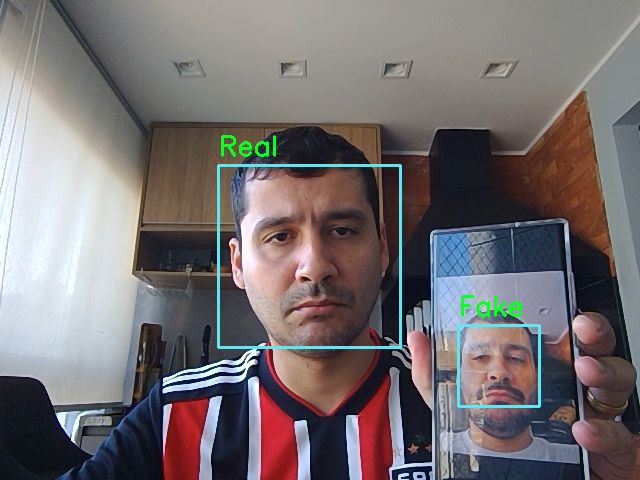

In [7]:
from google.colab.patches import cv2_imshow

labeled_image_path = detectar_marcar_labels("/content/ComputerVision/Validacao.jpg", model)

labeled = cv2.imread(labeled_image_path)
cv2_imshow(labeled)


>Com a implementação da solução na forma de uma aplicação do [Streamlit](https://www.streamlit.io/) (veja a pata streamlit-app e use o template) vale 1 ponto adicional.

**Pergunta**: Se utilizou o Streamlit, compartilhe a URL do aplicativo publicado:

**Resposta**:

## 6 Conclusões (2,5 pontos)

**Pergunta**: Dado todo o estudo e pesquisa, quais foram as conclusões sobre a solução, o que funcionou, o que não funcionou e quais os detalhes que observariam numa nova versão e melhorias do processo?

**Resposta**:

**Conclusões sobre a solução**

**O que funcionou**



1.   **Detecção de Faces:** A utilização do Haar Cascade para detecção de faces funcionou bem. O algoritmo conseguiu detectar rostos na maioria das imagens com uma boa taxa de sucesso;

2.   **Pré-processamento de Imagens:** O processo de redimensionamento e normalização das imagens foi eficaz;

3.   **Criação e Treinamento do Modelo:** A arquitetura da rede neural convolucional (CNN) com camadas de convolução, pooling e fully connected layers foi bem projetada. O modelo foi treinado com sucesso e alcançou uma boa precisão durante o treinamento e validação;

4.   **Predição e Rotulagem:** A função de predição e rotulagem funcionou conforme o esperado, classificando as faces detectadas como "Real" ou "Fake" com base nas previsões do modelo treinado.

**O que não funcionou**



1.   **Análise de Movimento:** A solução atual não implementa técnicas de análise de movimento dos olhos e boca. A ausência dessas técnicas pode reduzir a precisão na detecção de vivacidade, especialmente em casos onde fotos estáticas de alta qualidade são usadas;
2.   **Diversidade do Dataset:** A eficácia da detecção de vivacidade depende fortemente da qualidade e diversidade do dataset. Se o dataset não incluir uma variedade suficiente de condições de iluminação, expressões faciais e ângulos, o modelo pode ter dificuldades em generalizar para novos exemplos;
3.   **Margens no Recorte de Face:** O aumento da margem ao redor do rosto detectado pode incluir partes não faciais da imagem, potencialmente afetando a precisão da classificação de vivacidade.

**Melhorias para próximas versões**

1.   **Implementar análise de movimento:** Adicionar técnicas para detectar movimentos sutis dos olhos e da boca ao longo de uma sequência de frames. Isso pode envolver o uso de bibliotecas como 'dlib' para rastreamento de pontos-chave do rosto e análise de mudanças na posição desses pontos;

2.   **Aprimorar o dataset:** Expandir o dataset para incluir uma maior variedade de condições de iluminação, expressões faciais, ângulos de rosto e diferentes dispositivos de captura. Isso ajudará o modelo a generalizar melhor para novos exemplos;

3.   **Validação cruzada:** Implementar técnicas de validação cruzada durante o treinamento para garantir que o modelo não está sobreajustado aos dados de treinamento e pode generalizar bem para novos dados;

4.   **Regularização adicional:** Adicionar técnicas de regularização como Dropout, Batch Normalization e Data Augmentation para melhorar a robustez do modelo e reduzir o risco de overfitting;

5.   **Avaliar diferentes arquiteturas de modelo:** Experimentar com diferentes arquiteturas de CNN e até mesmo modelos pré-treinados em tarefas de classificação facial, como o VGG-Face ou ResNet, para comparar o desempenho.

6.   **Testes de robustez:** Realizar testes de robustez com uma ampla gama de cenários, incluindo tentativas de fraude mais sofisticadas, como o uso de fotos impressas de alta qualidade ou vídeos;